In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from adaptive_al.utils.data_loader import load_agnews

sns.set(style="whitegrid")


## Load Dataset

In [2]:
df_train, df_val, df_test = load_agnews()
df = pd.concat([df_train, df_val, df_test])
df.head()


,text,label
6836,10 seconds that change everything. ATHENS - Te...,1
90699,Charline Labonte rises to challenge. Charline ...,1
65214,Ex-El Paso Traders Plead Guilty to False Repor...,2
87713,Brit deal #39;one year only. Even if British ...,1
109406,"Signed, Sealed, Delivered. CHICAGO - The Cubs ...",1


In [3]:
print(sorted(df["label"].unique()))


[0, 1, 2, 3]


## Class Balance

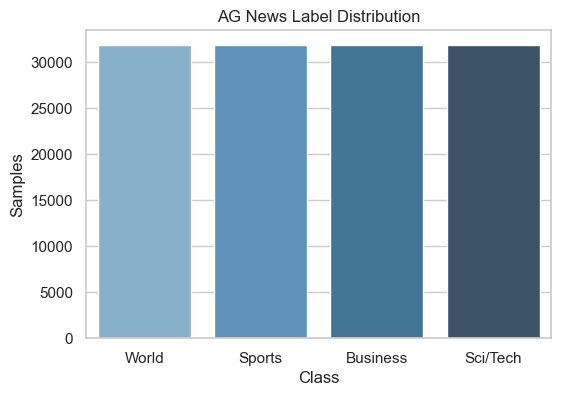

In [4]:
label_map = {
    0: "World",
    1: "Sports",
    2: "Business",
    3: "Sci/Tech"
}


label_counts = df["label"].value_counts().sort_index()
plt.figure(figsize=(6,4))
sns.barplot(x=[label_map[i] for i in label_counts.index], y=label_counts.values, palette="Blues_d")
plt.title("AG News Label Distribution")
plt.ylabel("Samples")
plt.xlabel("Class")
plt.show()


## Text Length Distribution

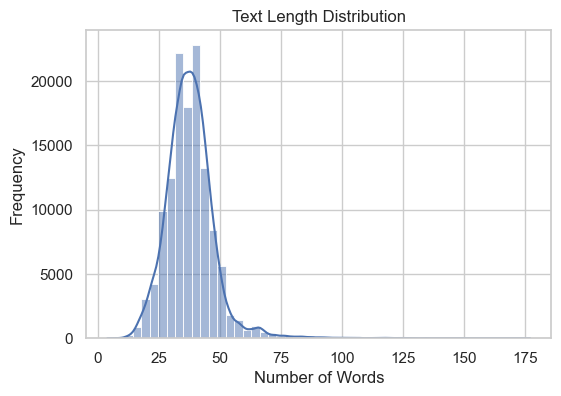

In [5]:
df["text_length"] = df["text"].apply(lambda x: len(str(x).split()))

plt.figure(figsize=(6, 4))
sns.histplot(df["text_length"], bins=50, kde=True)
plt.title("Text Length Distribution")
plt.xlabel("Number of Words")
plt.ylabel("Frequency")
plt.show()


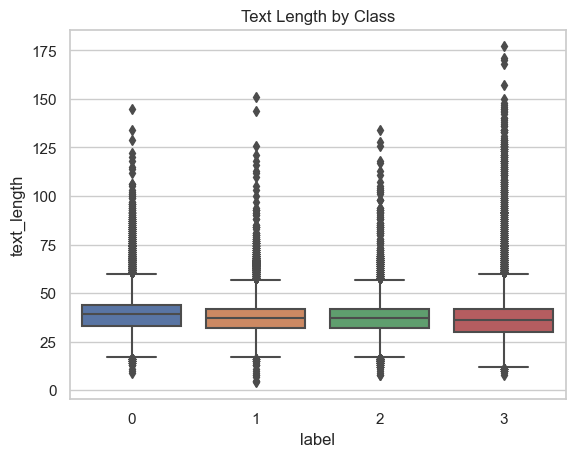

In [6]:
import seaborn as sns
sns.boxplot(x="label", y="text_length", data=df)
plt.title("Text Length by Class")
plt.show()


In [7]:
for label_id, label_name in label_map.items():
    print(f"\nExample from class: {label_name}")
    sample = df[df["label"] == label_id].iloc[0]
    print(sample["text"])



Example from class: World
Explosions caused mushroom cloud over N. Korea: source. SEOUL, SOUTH KOREA - A mushroom-shaped cloud was seen in North Korea last Thursday following a large explosion, a South Korean news agency reported Sunday.

Example from class: Sports
10 seconds that change everything. ATHENS - Ten seconds. Barely time enough to tie a shoe, wash a glass, get the paper off the porch. But when the moment comes, and eight men kneel at their blocks and peer down the empty, waiting track, it is as if the entire Olympics stop to watch.

Example from class: Business
Ex-El Paso Traders Plead Guilty to False Reports. Two more former natural gas traders for El Paso Corp. have pleaded guilty to reporting bogus deals in a widening investigation of the industry, the US Attorney #39;s Office said.

Example from class: Sci/Tech
XBox Owner Sues Microsoft. drusoicy writes  quot;Reuters is reporting that Sean Burke has filed suit against Microsoft because his XBox system stopped reading d

## Unique Word Count

In [8]:
from collections import Counter
from itertools import chain

tokenized = df["text"].apply(lambda x: str(x).lower().split())
vocab = Counter(chain.from_iterable(tokenized))
print(f"Unique words in training set: {len(vocab)}")


Unique words in training set: 169787


## Most Frequent Words Per Class

In [9]:
from collections import Counter
from wordcloud import STOPWORDS

stopwords = set(STOPWORDS)

for label_id, label_name in label_map.items():
    subset = df[df["label"] == label_id]
    words = " ".join(subset["text"]).lower().split()

    # Filter out stopwords
    filtered_words = [word for word in words if word not in stopwords and word.isalpha()]

    common = Counter(filtered_words).most_common(10)

    print(f"\nTop words in {label_name}:")
    for word, freq in common:
        print(f"  {word}: {freq}")



Top words in World:
  said: 5820
  president: 4146
  iraq: 4096
  us: 3866
  new: 3662
  two: 3498
  minister: 3238
  killed: 3099
  ap: 2975
  will: 2559

Top words in Sports:
  new: 4325
  first: 4099
  will: 3768
  ap: 3315
  game: 3081
  win: 3069
  world: 3024
  last: 2912
  team: 2906
  two: 2812

Top words in Business:
  said: 7084
  new: 6911
  oil: 6324
  us: 5821
  will: 4245
  prices: 3790
  company: 3451
  york: 3203
  percent: 2809
  stocks: 2573

Top words in Sci/Tech:
  new: 7458
  will: 4823
  microsoft: 4793
  said: 3435
  software: 3183
  internet: 2996
  company: 2441
  first: 2239
  space: 2195
  search: 2190


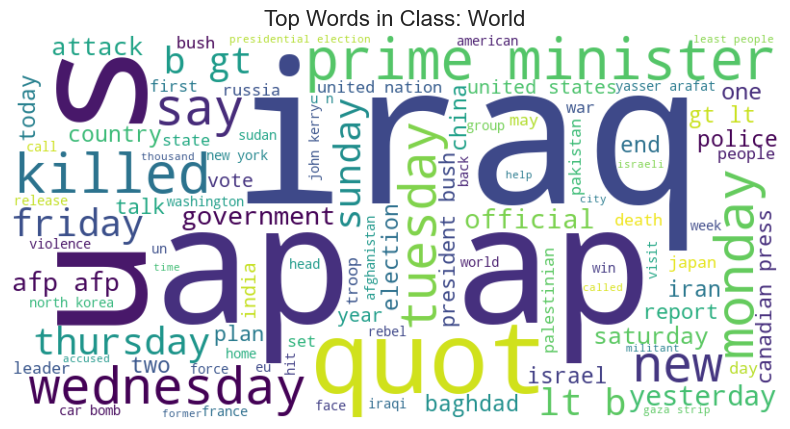

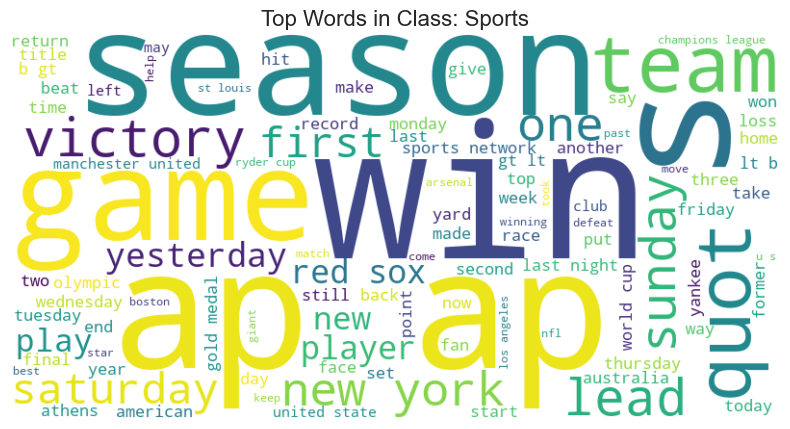

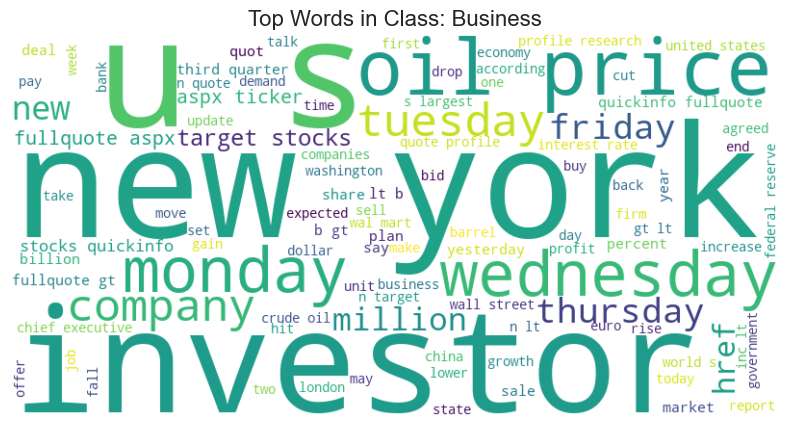

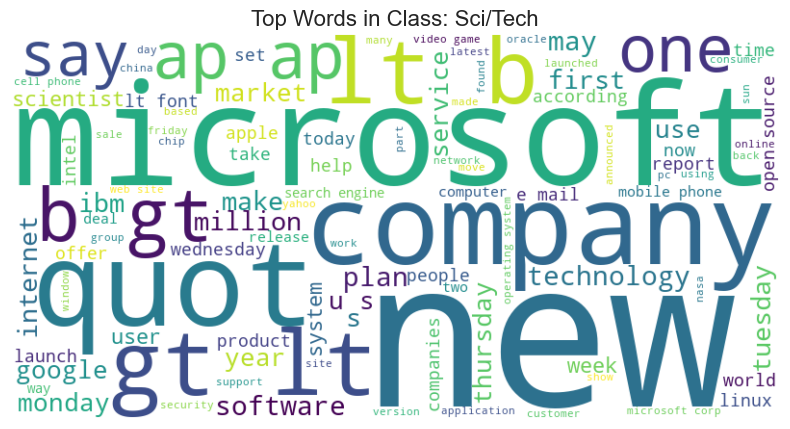

In [10]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

# Combine default stopwords with some custom ones (optional)
custom_stopwords = set(STOPWORDS).union({"said", "will", "us", "reuters"})
for label_id, label_name in label_map.items():
    subset = df[df["label"] == label_id]
    text_blob = " ".join(subset["text"].astype(str)).lower()

    wordcloud = WordCloud(width=800, height=400, background_color='white',
                          stopwords=custom_stopwords, max_words=100).generate(text_blob)

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(f"Top Words in Class: {label_name}", fontsize=16)
    plt.show()
